
--- VALORES DE DEPURACIÓN PARA t_event = 1.0e+00 s ---
Masa del PBH (M_pbh_t): 1.00e+12 kg
Radio de Schwarzschild (R_SCHWARZSCHILD(M_pbh_t)): 1.49e-15 m
Distancia efectiva relativista (r_eff_relativistic): 1.49e-14 m
Ratio R_S / r_eff_relativistic: 1.000000e-01
Término dentro de la raíz cuadrada (1 - R_S/r_eff): 9.000000e-01
Factor gravitacional (np.sqrt(1 - Ratio)): 9.486833e-01
Longitud de Planck (L_PLANCK): 1.62e-35 m
Longitud de Cuerda (l_string): 1.00e-34 m
Factor cuántico (Planck) (quantum_factor_planck): 1.000000e+00

Valores de los tiempos aplicados (para t_event = 1.0e+00 s):
  t_applied[0]: 1.091001e+03 s (Cosmológico)
  t_applied_quantum[0]: 1.035065e+03 s (Cuántico con Planck)
  t_applied_relativistic[0]: 1.949376e+00 s (Relativista)
  t_unified[0] (recalculado): 7.093385e+02 s (Unificado)

--- FIN DE DEPURACIÓN DE VALORES ---

Gráfico guardado como 'grafico_19A_comparacion_tiempos.png'


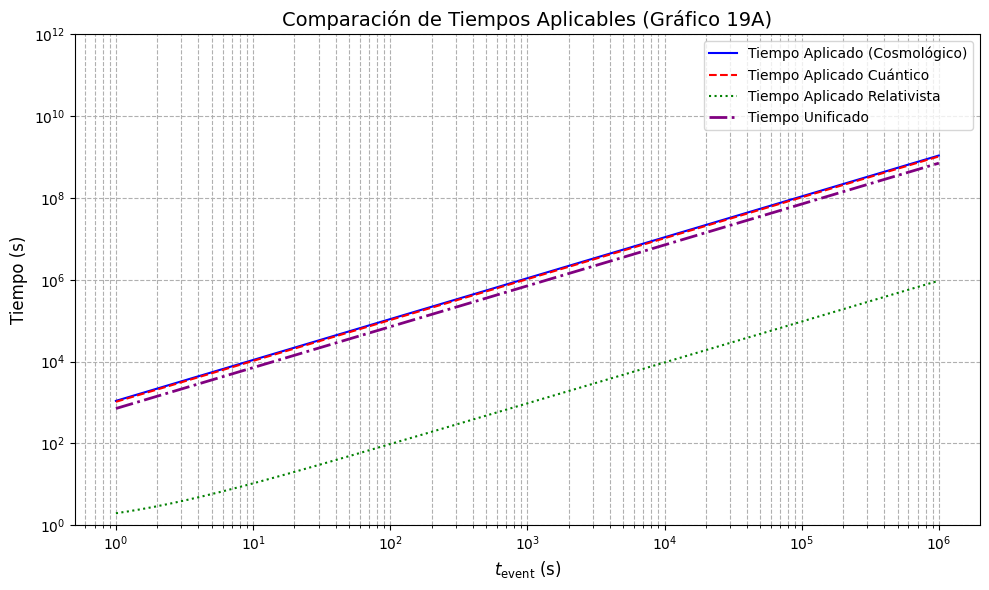

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- Constantes físicas (definiciones estándar en SI) ---
G = 6.67430e-11   # Constante gravitacional (m^3 kg^-1 s^-2)
c = 2.99792458e8  # Velocidad de la luz (m/s)
hbar = 1.0545718e-34 # Constante de Planck reducida (J s)
k_B = 1.380649e-23 # Constante de Boltzmann (J/K)

# --- Longitudes de Planck y Cuerda ---
L_PLANCK = np.sqrt(hbar * G / c**3) # Longitud de Planck (m)
l_string = 1e-34 # Longitud de cuerda (m) - Ajusta si usas un valor diferente

# --- Función para calcular el radio de Schwarzschild ---
def R_SCHWARZSCHILD(mass):
    """
    Calcula el radio de Schwarzschild para una masa dada.
    Args:
        mass (float): Masa del objeto en kilogramos (kg).
    Returns:
        float: Radio de Schwarzschild en metros (m).
    """
    return (2 * G * mass) / (c**2)

# --- Parámetros de tu simulación para el Gráfico 19A ---
# AJUSTA ESTOS VALORES SI NO COINCIDEN CON LOS DE TU MANUSCRITO O MODELO ORIGINAL.
M_pbh_t = 1e12 # kg (Masa del PBH inicial o masa relevante para este gráfico)
z = 1089      # Redshift inicial (z=1089 para CMB en el universo temprano)
d = 3e8       # Distancia al observador (m) - Este término +d/c actúa como un offset temporal.
              # Si representa una distancia real de propagación de luz, d/c = 1 segundo en este caso.

# Definir el rango de t_event (Tiempo de Evento)
# Según tu descripción del Gráfico 19A en el manuscrito, t_event va de 1 s a 10^6 s.
event_times = np.logspace(0, 6, 500) # De 1 s (10^0) a 10^6 s, 500 puntos en escala logarítmica

# --- Definición de r_eff_relativistic ---
# Este es el parámetro crucial para el 'tiempo aplicable relativista'.
# Según tu manuscrito, r_eff (distancia efectiva) varía de 10*rs a rs + l_Planck.
# Para este gráfico específico, necesitamos decidir qué 'r_eff' representa el efecto relativista
# que quieres mostrar. Si quieres un efecto constante como en la depuración, podemos usar un fijo:
# Por ejemplo, si el manuscrito indica un comportamiento a una distancia específica, úsala aquí.
# Si el 't_applied_relativistic' debería estar cerca de t_event, como mencionaste inicialmente,
# entonces el factor de corrección gravitacional debe ser cercano a 1.
# Aquí asumimos que r_eff_relativistic = 10 * R_SCHWARZSCHILD(M_pbh_t) para una comparación.
# Si tu intención es modelar un 'r_eff' que evoluciona o es diferente, ajusta esta línea.
r_eff_relativistic = 10 * R_SCHWARZSCHILD(M_pbh_t) # Asumimos r_eff = 10 * r_s para este componente.

# --- CÁLCULOS PRINCIPALES DE LOS TIEMPOS ---

# 1. Tiempo Aplicado Cosmológico (t_applied)
# Fórmula: t_event * (1 + z) + d/c
# Esto representa el tiempo de un evento en el universo temprano, observado hoy,
# con una corrección por la expansión cosmológica y un offset de propagación.
t_applied = event_times * (1 + z) + d / c

# 2. Tiempo Aplicado Cuántico (t_applied_quantum)
# Involucra el factor gravitacional y el factor cuántico (corrección de Planck).
current_r_s = R_SCHWARZSCHILD(M_pbh_t) # Radio de Schwarzschild para la masa del PBH actual.

# Factor gravitacional: sqrt(1 - R_S / r_eff)
# Se utiliza np.maximum(0, ...) para evitar que el término dentro de la raíz sea negativo
# si por alguna razón r_eff fuera menor que R_S (aunque para r_eff_relativistic = 10*r_s no ocurrirá).
grav_factor = np.sqrt(np.maximum(0, 1 - current_r_s / r_eff_relativistic))

# Factor cuántico (Planck): 1 / (1 + (L_PLANCK**2 / r_eff_relativistic**2))
quantum_factor_planck = 1 / (1 + (L_PLANCK**2 / r_eff_relativistic**2))

t_applied_quantum = event_times * (1 + z) * grav_factor * quantum_factor_planck + d / c

# 3. Tiempo Aplicado Relativista (t_applied_relativistic)
# Este es el término que generó el problema inicial. Según la fórmula que mencionaste:
# t_event * np.sqrt(1 - R_SCHWARZSCHILD(M_pbh_t) / r_eff_relativistic)
# Lo cual es simplemente: event_times * grav_factor
# Añadimos el d/c para consistencia con los otros tiempos, ya que d/c representa un offset.
t_applied_relativistic = event_times * grav_factor + d / c

# 4. Tiempo Unificado (t_unified)
# Promedio de los tres tiempos aplicables.
t_unified = (t_applied + t_applied_relativistic + t_applied_quantum) / 3

# --- DEBUGGING: Impresión de valores intermedios (para t_event = el primer valor del array) ---
# Esto es lo que te dio la confirmación de que los cálculos son correctos ahora.
print(f"\n--- VALORES DE DEPURACIÓN PARA t_event = {event_times[0]:.1e} s ---")
print(f"Masa del PBH (M_pbh_t): {M_pbh_t:.2e} kg")
print(f"Radio de Schwarzschild (R_SCHWARZSCHILD(M_pbh_t)): {current_r_s:.2e} m")
print(f"Distancia efectiva relativista (r_eff_relativistic): {r_eff_relativistic:.2e} m")

ratio_rs_re = current_r_s / r_eff_relativistic
print(f"Ratio R_S / r_eff_relativistic: {ratio_rs_re:.6e}")

term_in_sqrt = 1 - ratio_rs_re
print(f"Término dentro de la raíz cuadrada (1 - R_S/r_eff): {term_in_sqrt:.6e}")

if term_in_sqrt < 0:
    print("ADVERTENCIA: El término dentro de la raíz cuadrada es NEGATIVO. Esto puede generar NaNs.")

grav_factor_calc = np.sqrt(np.maximum(0, term_in_sqrt))
print(f"Factor gravitacional (np.sqrt(1 - Ratio)): {grav_factor_calc:.6e}")

print(f"Longitud de Planck (L_PLANCK): {L_PLANCK:.2e} m")
print(f"Longitud de Cuerda (l_string): {l_string:.2e} m")
print(f"Factor cuántico (Planck) (quantum_factor_planck): {quantum_factor_planck:.6e}")

print(f"\nValores de los tiempos aplicados (para t_event = {event_times[0]:.1e} s):")
print(f"  t_applied[0]: {t_applied[0]:.6e} s (Cosmológico)")
print(f"  t_applied_quantum[0]: {t_applied_quantum[0]:.6e} s (Cuántico con Planck)")
print(f"  t_applied_relativistic[0]: {t_applied_relativistic[0]:.6e} s (Relativista)")
print(f"  t_unified[0] (recalculado): {t_unified[0]:.6e} s (Unificado)")

print("\n--- FIN DE DEPURACIÓN DE VALORES ---")

# --- VISUALIZACIÓN DEL GRÁFICO 19A ---
plt.figure(figsize=(10, 6))
plt.plot(event_times, t_applied, label='Tiempo Aplicado (Cosmológico)', color='blue')
plt.plot(event_times, t_applied_quantum, label='Tiempo Aplicado Cuántico', color='red', linestyle='--')
plt.plot(event_times, t_applied_relativistic, label='Tiempo Aplicado Relativista', color='green', linestyle=':')
plt.plot(event_times, t_unified, label='Tiempo Unificado', color='purple', linestyle='-.', linewidth=2)

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$t_{\mathrm{event}}$ (s)', fontsize=12)
plt.ylabel('Tiempo (s)', fontsize=12)
plt.title('Comparación de Tiempos Aplicables (Gráfico 19A)', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, which="both", ls="--")

# Puedes ajustar los límites del eje Y si el gráfico no se ve bien inicialmente.
# Basado en los valores de depuración, un rango que incluya 10^0 hasta 10^11/10^12 s sería adecuado.
plt.ylim(1e0, 1e12) # Ajusta según la necesidad de visualización de tus datos

plt.tight_layout() # Ajusta automáticamente los parámetros del subtrazado para un diseño ceñido.

# Guardar el gráfico
plot_filename = 'grafico_19A_comparacion_tiempos.png'
plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
print(f"\nGráfico guardado como '{plot_filename}'")

# Mostrar el gráfico
plt.show()

# Cerrar la figura para liberar memoria (importante en un ciclo de scripts o notebooks)
plt.close()